c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Epoch 1/500


c:\Users\KOUST\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 - 2s - 141ms/step - loss: 0.2556 - val_loss: 0.1370
Epoch 2/500
12/12 - 0s - 6ms/step - loss: 0.2160 - val_loss: 0.0984
Epoch 3/500
12/12 - 0s - 8ms/step - loss: 0.1747 - val_loss: 0.0716
Epoch 4/500
12/12 - 0s - 7ms/step - loss: 0.1339 - val_loss: 0.0797
Epoch 5/500
12/12 - 0s - 6ms/step - loss: 0.1013 - val_loss: 0.1019
Epoch 6/500
12/12 - 0s - 10ms/step - loss: 0.0842 - val_loss: 0.1173
Epoch 7/500
12/12 - 0s - 5ms/step - loss: 0.0800 - val_loss: 0.1211
Epoch 8/500
12/12 - 0s - 6ms/step - loss: 0.0791 - val_loss: 0.1175
Epoch 9/500
12/12 - 0s - 5ms/step - loss: 0.0778 - val_loss: 0.1131
Epoch 10/500
12/12 - 0s - 5ms/step - loss: 0.0762 - val_loss: 0.1096
Epoch 11/500
12/12 - 0s - 5ms/step - loss: 0.0745 - val_loss: 0.1074
Epoch 12/500
12/12 - 0s - 5ms/step - loss: 0.0727 - val_loss: 0.1054
Epoch 13/500
12/12 - 0s - 5ms/step - loss: 0.0709 - val_loss: 0.1032
Epoch 14/500
12/12 - 0s - 5ms/step - loss: 0.0691 - val_loss: 0.1010
Epoch 15/500
12/12 - 0s - 6ms/step - loss: 0.0673 - 

18:13:13 - cmdstanpy - INFO - Chain [1] start processing
18:13:13 - cmdstanpy - INFO - Chain [1] done processing


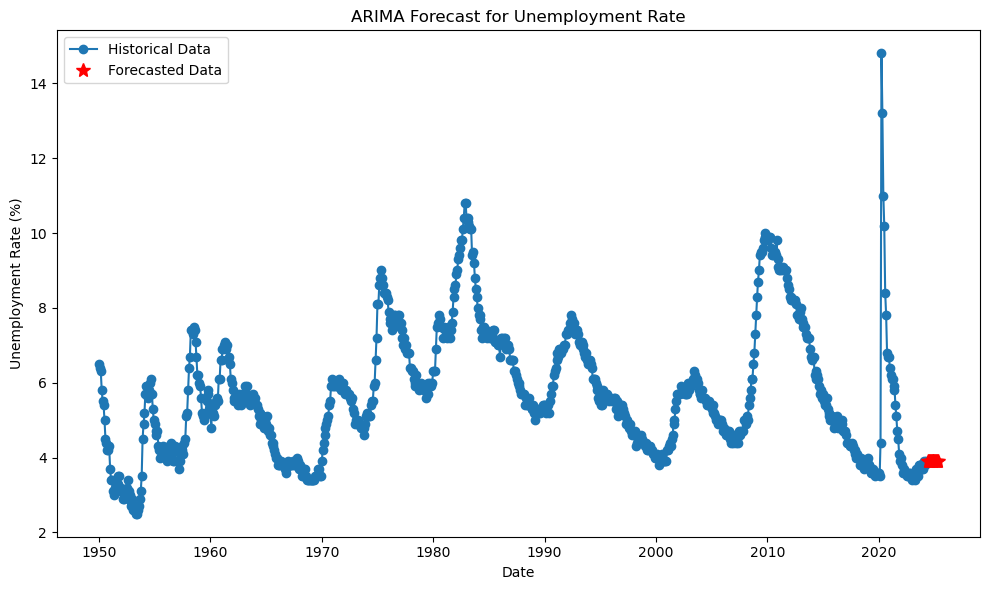

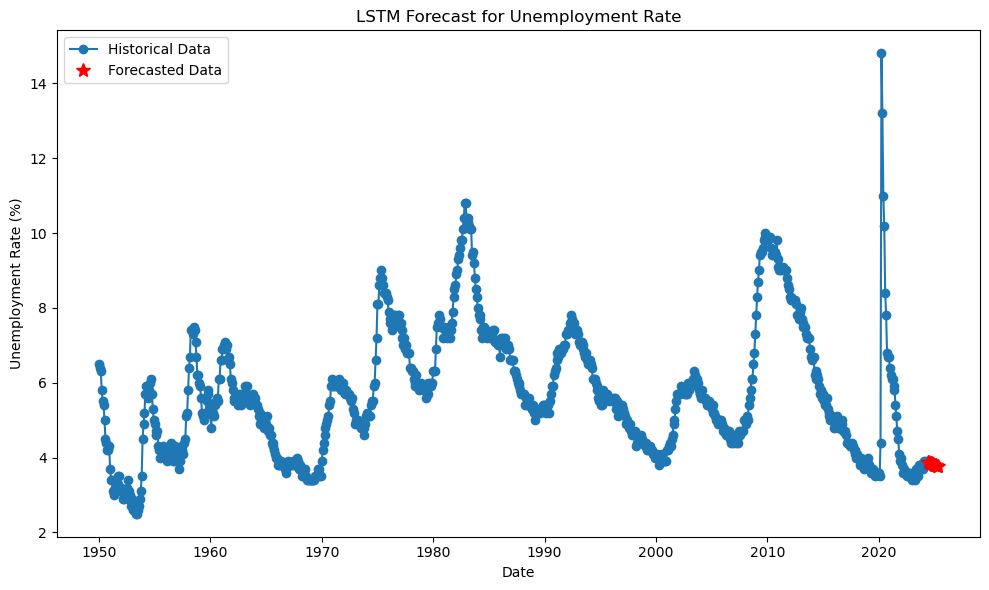

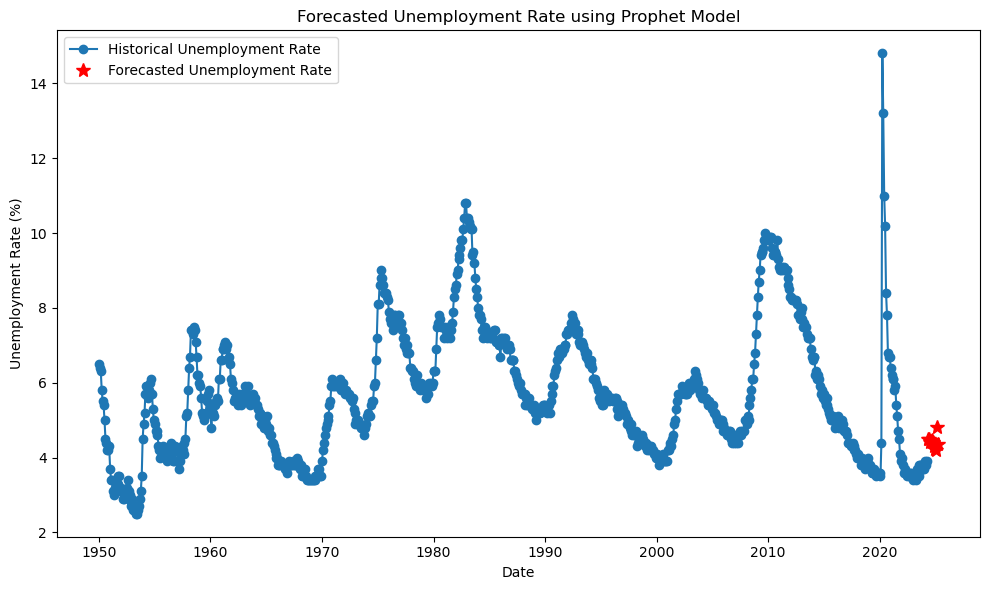


ARIMA Forecast for Unemployment Rate:
Forecasted Unemployment Rate for 2024-5: 3.92% (0.44% from last observed rate)
Forecasted Unemployment Rate for 2024-6: 3.90% (-0.06% from last observed rate)
Forecasted Unemployment Rate for 2024-7: 3.91% (0.17% from last observed rate)
Forecasted Unemployment Rate for 2024-8: 3.90% (0.04% from last observed rate)
Forecasted Unemployment Rate for 2024-9: 3.90% (0.01% from last observed rate)
Forecasted Unemployment Rate for 2024-10: 3.90% (0.06% from last observed rate)
Forecasted Unemployment Rate for 2024-11: 3.90% (0.04% from last observed rate)
Forecasted Unemployment Rate for 2024-12: 3.90% (0.05% from last observed rate)
Forecasted Unemployment Rate for 2025-1: 3.90% (0.05% from last observed rate)
Forecasted Unemployment Rate for 2025-2: 3.90% (0.04% from last observed rate)
Forecasted Unemployment Rate for 2025-3: 3.90% (0.05% from last observed rate)
Forecasted Unemployment Rate for 2025-4: 3.90% (0.05% from last observed rate)

LSTM For

c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

RMSE Comparison:
ARIMA: 0.16
LSTM: 1.17
Prophet: 1.01


In [2]:
from fredapi import Fred
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from datetime import datetime

# Initialize the FRED API with your API key
fred = Fred(api_key='b43431d564515744c751e7a57be340ac')

# Fetch monthly unemployment rate data from FRED
unemployment_data = fred.get_series('UNRATE', observation_start='1950-01-01')

# Convert the series to a DataFrame and rename the column to 'UnemploymentRate'
df = pd.DataFrame(unemployment_data, columns=['UnemploymentRate'])
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime

# Function to plot forecasts
def plot_forecast(df, forecast, forecast_dates, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['UnemploymentRate'], label='Historical Data', marker='o')
    plt.plot(forecast_dates, forecast, 'r*', label='Forecasted Data', markersize=10)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ARIMA Forecasting
model_arima = ARIMA(df['UnemploymentRate'], order=(5, 1, 0))  # Define the ARIMA model with order (5, 1, 0)
model_fit_arima = model_arima.fit()  # Fit the model to the unemployment rate data
forecast_arima = model_fit_arima.forecast(steps=12)  # Forecast the next 12 months
forecast_dates_arima = pd.date_range(start=df.index[-1], periods=13, freq='M')[1:]  # Define the forecast dates

# LSTM Forecasting

# Normalize the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(df['UnemploymentRate'].values.reshape(-1, 1))

# Function to convert time series data to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols, names = [], []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(data.shape[1])]
    for i in range(n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(data.shape[1])]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(data.shape[1])]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Convert the normalized series to a supervised learning format
reframed = series_to_supervised(scaled_values, 1, 1)
values = reframed.values

# Split the data into training and testing sets
n_train_time = int(len(values) * 0.9)
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# Separate the inputs and outputs for training and testing sets
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape the inputs to be 3D [samples, timesteps, features] for LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')

# Train the LSTM model
model_lstm.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Forecast using the LSTM model
input_data = np.array([[df['UnemploymentRate'].iloc[-1]]])
input_data = scaler.transform(input_data.reshape(1, -1))
input_data = input_data.reshape((input_data.shape[0], 1, input_data.shape[1]))

forecast_lstm = []
for i in range(12):
    forecast = model_lstm.predict(input_data)
    forecast_lstm.append(forecast[0, 0])
    input_data[0, 0, 0] = forecast[0, 0]

# Inverse transform the forecasted values to original scale
forecast_lstm = np.array(forecast_lstm).reshape(-1, 1)
forecast_lstm = scaler.inverse_transform(forecast_lstm)
forecast_lstm = forecast_lstm[:, 0]
forecast_dates_lstm = pd.date_range(start=df.index[-1], periods=13, freq='M')[1:]

# Prophet Forecasting
df_prophet = df.reset_index().rename(columns={'index': 'ds', 'UnemploymentRate': 'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future_prophet = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future_prophet)
forecast_dates_prophet = future_prophet['ds'].tail(12).values
forecast_prophet = forecast_prophet['yhat'].tail(12).values

# Plotting the forecasts for each model
plot_forecast(df, forecast_arima, forecast_dates_arima, 'ARIMA Forecast for Unemployment Rate', 'Unemployment Rate (%)')
plot_forecast(df, forecast_lstm, forecast_dates_lstm, 'LSTM Forecast for Unemployment Rate', 'Unemployment Rate (%)')

# Plotting the forecast for Prophet model separately
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['UnemploymentRate'], label='Historical Unemployment Rate', marker='o')
plt.plot(forecast_dates_prophet, forecast_prophet, 'r*', label='Forecasted Unemployment Rate', markersize=10)
plt.title('Forecasted Unemployment Rate using Prophet Model')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Printing the forecasted values and percentage changes
models = ['ARIMA', 'LSTM', 'Prophet']
forecasts = [forecast_arima, forecast_lstm, forecast_prophet]
forecast_dates = [forecast_dates_arima, forecast_dates_lstm, forecast_dates_prophet]

for model_name, forecast, dates in zip(models, forecasts, forecast_dates):
    print(f'\n{model_name} Forecast for Unemployment Rate:')
    last_observed_rate = df['UnemploymentRate'].iloc[-1]
    for date, value in zip(dates, forecast):
        # Convert numpy.datetime64 to pandas Timestamp
        date = pd.Timestamp(date)
        percentage_change = ((value - last_observed_rate) / last_observed_rate) * 100
        print(f"Forecasted Unemployment Rate for {date.year}-{date.month}: {value:.2f}% ({percentage_change:.2f}% from last observed rate)")

# Comparative Analysis with RMSE
# Split the data into training and testing sets for RMSE calculation
train_data = df['UnemploymentRate'].iloc[:-24]  # Use all but the last 24 months for training
test_data = df['UnemploymentRate'].iloc[-24:]  # Use the last 24 months for testing

# ARIMA model RMSE
model_arima = ARIMA(train_data, order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima_test = model_fit_arima.forecast(steps=len(test_data))
rmse_arima = sqrt(mean_squared_error(test_data, forecast_arima_test))

# LSTM model RMSE
test_X_lstm = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
yhat_lstm = model_lstm.predict(test_X)
test_X_lstm = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat_lstm = np.concatenate((yhat_lstm, test_X_lstm[:, 1:]), axis=1)
inv_yhat_lstm = scaler.inverse_transform(inv_yhat_lstm)
inv_yhat_lstm = inv_yhat_lstm[:, 0]
inv_y_lstm = np.concatenate((test_y.reshape(-1, 1), test_X_lstm[:, 1:]), axis=1)
inv_y_lstm = scaler.inverse_transform(inv_y_lstm)
inv_y_lstm = inv_y_lstm[:, 0]
rmse_lstm = sqrt(mean_squared_error(inv_y_lstm, inv_yhat_lstm))

# Prophet model RMSE
df_test_prophet = df_prophet.iloc[-24:]
forecast_prophet_test = model_prophet.predict(df_test_prophet)
forecast_prophet_test = forecast_prophet_test['yhat'].values
rmse_prophet = sqrt(mean_squared_error(df_test_prophet['y'], forecast_prophet_test))

print(f'\nRMSE Comparison:')
print(f'ARIMA: {rmse_arima:.2f}')
print(f'LSTM: {rmse_lstm:.2f}')
print(f'Prophet: {rmse_prophet:.2f}')

In [3]:
from textblob import TextBlob

# Function to generate interpretations using sentiment analysis
def generate_interpretation(forecast_values):
    interpretations = []
    for value in forecast_values:
        # You may need to adjust this threshold based on your data and sentiment analysis model
        sentiment = TextBlob(f"Unemployment is forecasted to be {value:.2f}%").sentiment.polarity
        if sentiment > 0:
            interpretation = "Positive trend: The forecast suggests a decrease in unemployment."
        elif sentiment < 0:
            interpretation = "Negative trend: The forecast suggests an increase in unemployment."
        else:
            interpretation = "Neutral: The forecast suggests stability in unemployment."
        interpretations.append(interpretation)
    return interpretations

# Generate interpretations for each forecast
arima_interpretations = generate_interpretation(forecast_arima)
lstm_interpretations = generate_interpretation(forecast_lstm)
prophet_interpretations = generate_interpretation(forecast_prophet)

# Print interpretations
print("\nInterpretations:")
for i, (arima_int, lstm_int, prophet_int) in enumerate(zip(arima_interpretations, lstm_interpretations, prophet_interpretations)):
    print(f"\nForecast {i+1}:")
    print(f"ARIMA: {arima_int}")
    print(f"LSTM: {lstm_int}")
    print(f"Prophet: {prophet_int}")



Interpretations:

Forecast 1:
ARIMA: Neutral: The forecast suggests stability in unemployment.
LSTM: Neutral: The forecast suggests stability in unemployment.
Prophet: Neutral: The forecast suggests stability in unemployment.

Forecast 2:
ARIMA: Neutral: The forecast suggests stability in unemployment.
LSTM: Neutral: The forecast suggests stability in unemployment.
Prophet: Neutral: The forecast suggests stability in unemployment.

Forecast 3:
ARIMA: Neutral: The forecast suggests stability in unemployment.
LSTM: Neutral: The forecast suggests stability in unemployment.
Prophet: Neutral: The forecast suggests stability in unemployment.

Forecast 4:
ARIMA: Neutral: The forecast suggests stability in unemployment.
LSTM: Neutral: The forecast suggests stability in unemployment.
Prophet: Neutral: The forecast suggests stability in unemployment.

Forecast 5:
ARIMA: Neutral: The forecast suggests stability in unemployment.
LSTM: Neutral: The forecast suggests stability in unemployment.
Prop

c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Epoch 1/500


c:\Users\KOUST\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 - 2s - 186ms/step - loss: 0.2586 - val_loss: 0.1337
Epoch 2/500
12/12 - 0s - 9ms/step - loss: 0.2116 - val_loss: 0.0891
Epoch 3/500
12/12 - 0s - 7ms/step - loss: 0.1654 - val_loss: 0.0735
Epoch 4/500
12/12 - 0s - 7ms/step - loss: 0.1241 - val_loss: 0.0891
Epoch 5/500
12/12 - 0s - 9ms/step - loss: 0.0955 - val_loss: 0.1123
Epoch 6/500
12/12 - 0s - 8ms/step - loss: 0.0839 - val_loss: 0.1236
Epoch 7/500
12/12 - 0s - 7ms/step - loss: 0.0820 - val_loss: 0.1234
Epoch 8/500
12/12 - 0s - 7ms/step - loss: 0.0808 - val_loss: 0.1188
Epoch 9/500
12/12 - 0s - 8ms/step - loss: 0.0792 - val_loss: 0.1144
Epoch 10/500
12/12 - 0s - 7ms/step - loss: 0.0775 - val_loss: 0.1112
Epoch 11/500
12/12 - 0s - 8ms/step - loss: 0.0756 - val_loss: 0.1087
Epoch 12/500
12/12 - 0s - 7ms/step - loss: 0.0737 - val_loss: 0.1067
Epoch 13/500
12/12 - 0s - 9ms/step - loss: 0.0718 - val_loss: 0.1043
Epoch 14/500
12/12 - 0s - 8ms/step - loss: 0.0699 - val_loss: 0.1016
Epoch 15/500
12/12 - 0s - 7ms/step - loss: 0.0679 - v

17:16:34 - cmdstanpy - INFO - Chain [1] start processing
17:16:35 - cmdstanpy - INFO - Chain [1] done processing


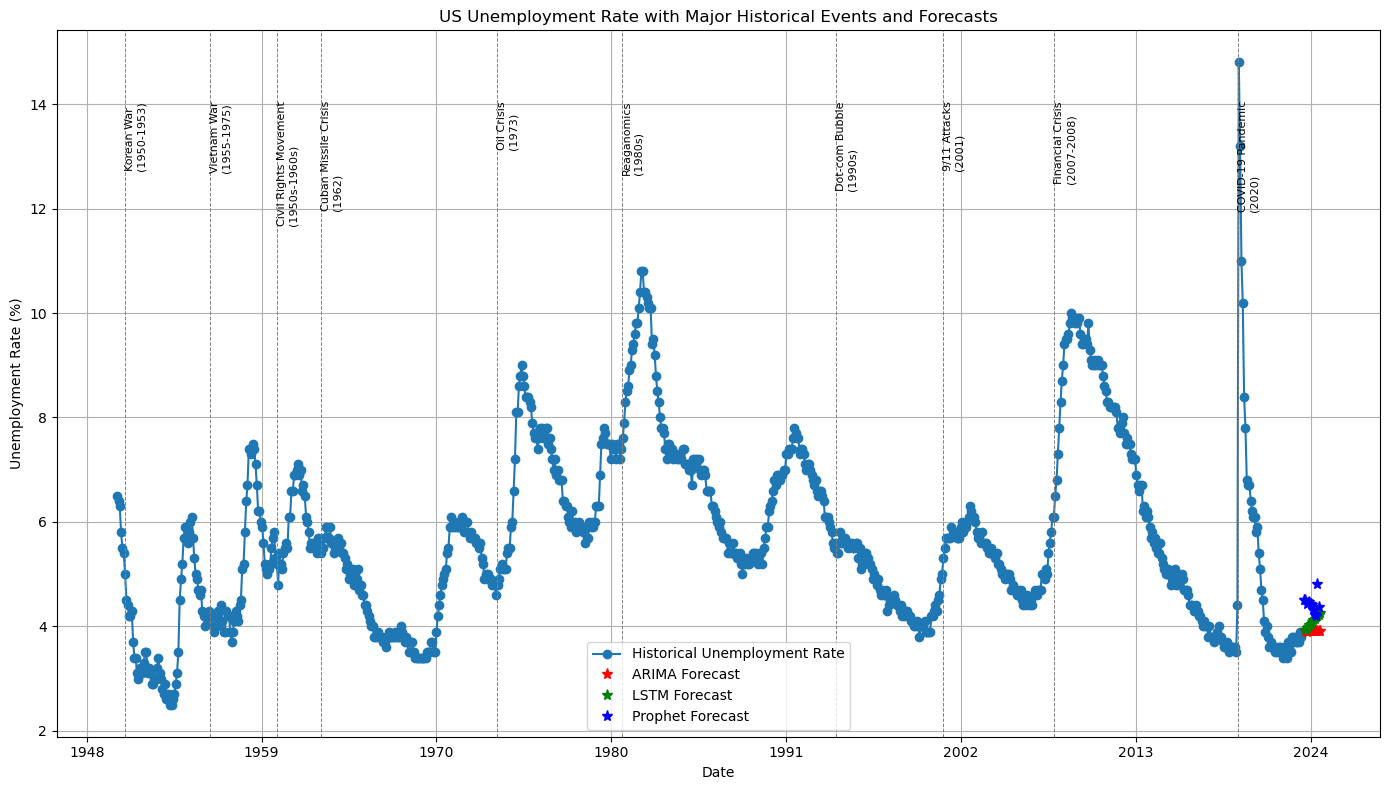

c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
RMSE for ARIMA model: 0.3505
RMSE for LSTM model: 1.1669
RMSE for Prophet model: 0.8091


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
from fredapi import Fred
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize the FRED API with your API key
fred = Fred(api_key='b43431d564515744c751e7a57be340ac')

# Fetch monthly unemployment rate data from FRED
unemployment_data = fred.get_series('UNRATE', observation_start='1950-01-01')

# Convert the series to a DataFrame and rename the column to 'UnemploymentRate'
df = pd.DataFrame(unemployment_data, columns=['UnemploymentRate'])
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime

# Historical events to annotate (event, date)
events = {
    'Korean War\n(1950-1953)': '1950-06-25',
    'Vietnam War\n(1955-1975)': '1955-11-01',
    'Civil Rights Movement\n(1950s-1960s)': '1960-01-01',
    'Cuban Missile Crisis\n(1962)': '1962-10-16',
    'Oil Crisis\n(1973)': '1973-10-17',
    'Reaganomics\n(1980s)': '1981-08-13',
    'Dot-com Bubble\n(1990s)': '1995-01-01',
    '9/11 Attacks\n(2001)': '2001-09-11',
    'Financial Crisis\n(2007-2008)': '2008-09-15',
    'COVID-19 Pandemic\n(2020)': '2020-03-11',
}

# Forecasting with ARIMA
model_arima = ARIMA(df['UnemploymentRate'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=12)

# Normalizing the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(df['UnemploymentRate'].values.reshape(-1, 1))

# Function to convert time series data to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols, names = [], []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(data.shape[1])]
    for i in range(n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(data.shape[1])]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(data.shape[1])]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Convert the normalized series to a supervised learning format
reframed = series_to_supervised(scaled_values, 1, 1)
values = reframed.values

# Split the data into training and testing sets
n_train_time = int(len(values) * 0.9)
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# Separate the inputs and outputs for training and testing sets
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape the inputs to be 3D [samples, timesteps, features] for LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')

# Train the LSTM model
model_lstm.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Forecast using the LSTM model
input_data = df['UnemploymentRate'].values[-1]
input_data = scaler.transform(np.array([[input_data]]))
input_data = input_data.reshape((1, 1, 1))

forecast_lstm = []
for _ in range(12):
    prediction = model_lstm.predict(input_data)
    forecast_lstm.append(prediction[0, 0])
    input_data = prediction.reshape((1, 1, 1))

# Inverse transform the forecasted values to original scale
forecast_lstm = scaler.inverse_transform(np.array(forecast_lstm).reshape(-1, 1)).flatten()

# Forecasting with Prophet
df_prophet = df.reset_index().rename(columns={'index': 'ds', 'UnemploymentRate': 'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future_prophet = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future_prophet)
forecast_prophet = forecast_prophet[['ds', 'yhat']].tail(12)
forecast_prophet_values = forecast_prophet['yhat'].values
forecast_prophet_dates = forecast_prophet['ds'].values

# Define forecast dates (assume monthly frequency for 12 months ahead)
forecast_dates = pd.date_range(start=df.index[-1], periods=13, freq='M')[1:]

# Ensure forecast arrays have the same length as forecast_dates
assert len(forecast_dates) == len(forecast_arima) == len(forecast_lstm) == len(forecast_prophet_values), "Forecast length mismatch"

# Plotting the historical unemployment rate with annotations
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['UnemploymentRate'], label='Historical Unemployment Rate', marker='o')

# Plot forecasted values
plt.plot(forecast_dates, forecast_arima, 'r*', label='ARIMA Forecast', markersize=8)
plt.plot(forecast_dates, forecast_lstm, 'g*', label='LSTM Forecast', markersize=8)
plt.plot(forecast_prophet_dates, forecast_prophet_values, 'b*', label='Prophet Forecast', markersize=8)

# Annotate major historical events
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--', linewidth=0.7)
    plt.text(pd.to_datetime(date), max(df['UnemploymentRate']) * 0.95, event, rotation=90, verticalalignment='top', fontsize=8)

# Formatting plot
plt.title('US Unemployment Rate with Major Historical Events and Forecasts')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

# RMSE Calculation and Comparison
# Split the data into training and testing sets for RMSE calculation
train_data = df['UnemploymentRate'].iloc[:-12]  # Use all but the last 12 months for training
test_data = df['UnemploymentRate'].iloc[-12:]  # Use the last 12 months for testing

# ARIMA model RMSE
model_arima = ARIMA(train_data, order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima_test = model_fit_arima.forecast(steps=len(test_data))
rmse_arima = sqrt(mean_squared_error(test_data, forecast_arima_test))

# LSTM model RMSE
test_X_lstm = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
yhat_lstm = model_lstm.predict(test_X)
test_X_lstm = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat_lstm = np.concatenate((yhat_lstm, test_X_lstm[:, 1:]), axis=1)
inv_yhat_lstm = scaler.inverse_transform(inv_yhat_lstm)
inv_yhat_lstm = inv_yhat_lstm[:, 0]
inv_y_lstm = np.concatenate((test_y.reshape(-1, 1), test_X_lstm[:, 1:]), axis=1)
inv_y_lstm = scaler.inverse_transform(inv_y_lstm)
inv_y_lstm = inv_y_lstm[:, 0]
rmse_lstm = sqrt(mean_squared_error(inv_y_lstm, inv_yhat_lstm))

# Prophet model RMSE
df_test_prophet = df_prophet.iloc[-12:]
forecast_prophet_test = model_prophet.predict(df_test_prophet[['ds']])
forecast_prophet_test = forecast_prophet_test[['ds', 'yhat']].tail(12)
rmse_prophet = sqrt(mean_squared_error(df_test_prophet['y'], forecast_prophet_test['yhat']))

print(f'RMSE for ARIMA model: {rmse_arima:.4f}')
print(f'RMSE for LSTM model: {rmse_lstm:.4f}')
print(f'RMSE for Prophet model: {rmse_prophet:.4f}')

## Unemployment Rate Forecasting and Analysis

This script forecasts the U.S. unemployment rate using three different time series forecasting methods: ARIMA, LSTM, and Prophet. Additionally, it annotates major historical events in the plot to provide context. The script also calculates the RMSE for each model to compare their performance.

### Libraries and API Setup

First, we import the necessary libraries and initialize the FRED API to fetch the unemployment rate data.

```python
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
from fredapi import Fred
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize the FRED API with your API key
fred = Fred(api_key='your_api_key_here')
```

### Data Fetching and Preparation

Fetch monthly unemployment rate data from FRED and convert it to a DataFrame. Also, define historical events to annotate on the plot.

```python
# Fetch monthly unemployment rate data from FRED
unemployment_data = fred.get_series('UNRATE', observation_start='1950-01-01')

# Convert the series to a DataFrame and rename the column to 'UnemploymentRate'
df = pd.DataFrame(unemployment_data, columns=['UnemploymentRate'])
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime

# Historical events to annotate (event, date)
events = [
    ('1973 Oil Crisis', '1973-10-01'),
    ('1980 Recession', '1980-01-01'),
    ('2001 Dot-com Bubble', '2001-03-01'),
    ('2008 Financial Crisis', '2008-09-01'),
    ('COVID-19 Pandemic', '2020-03-01')
]
```

### ARIMA Model

Fit an ARIMA model to the unemployment rate data and forecast the next 12 months.

```python
# Forecasting with ARIMA
model_arima = ARIMA(df['UnemploymentRate'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=12)
```

### LSTM Model

Normalize the data, prepare it for the LSTM model, build, train, and forecast using the LSTM model.

```python
# Normalizing the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(df['UnemploymentRate'].values.reshape(-1, 1))

# Function to convert time series data to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols, names = [], []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(data.shape[1])]
    for i in range(n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(data.shape[1])]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(data.shape[1])]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Convert the normalized series to a supervised learning format
reframed = series_to_supervised(scaled_values, 1, 1)
values = reframed.values

# Split the data into training and testing sets
n_train_time = int(len(values) * 0.9)
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# Separate the inputs and outputs for training and testing sets
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape the inputs to be 3D [samples, timesteps, features] for LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')

# Train the LSTM model
model_lstm.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Forecast using the LSTM model
input_data = df['UnemploymentRate'].values[-1]
input_data = scaler.transform(np.array([[input_data]]))
input_data = input_data.reshape((1, 1, 1))

forecast_lstm = []
for _ in range(12):
    prediction = model_lstm.predict(input_data)
    forecast_lstm.append(prediction[0, 0])
    input_data = prediction.reshape((1, 1, 1))

# Inverse transform the forecasted values to original scale
forecast_lstm = scaler.inverse_transform(np.array(forecast_lstm).reshape(-1, 1)).flatten()
```

### Prophet Model

Fit a Prophet model to the unemployment rate data and forecast the next 12 months.

```python
# Forecasting with Prophet
df_prophet = df.reset_index().rename(columns={'index': 'ds', 'UnemploymentRate': 'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future_prophet = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future_prophet)
forecast_prophet = forecast_prophet[['ds', 'yhat']].tail(12)
forecast_prophet_values = forecast_prophet['yhat'].values
forecast_prophet_dates = forecast_prophet['ds'].values
```

### Plotting

Plot the historical unemployment rate, forecasts, and annotate major historical events.

```python
# Define forecast dates (assume monthly frequency for 12 months ahead)
forecast_dates = pd.date_range(start=df.index[-1], periods=13, freq='M')[1:]

# Ensure forecast arrays have the same length as forecast_dates
assert len(forecast_dates) == len(forecast_arima) == len(forecast_lstm) == len(forecast_prophet_values), "Forecast length mismatch"

# Plotting the historical unemployment rate with annotations
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['UnemploymentRate'], label='Historical Unemployment Rate', marker='o')

# Plot forecasted values
plt.plot(forecast_dates, forecast_arima, 'r*', label='ARIMA Forecast', markersize=8)
plt.plot(forecast_dates, forecast_lstm, 'g*', label='LSTM Forecast', markersize=8)
plt.plot(forecast_prophet_dates, forecast_prophet_values, 'b*', label='Prophet Forecast', markersize=8)

# Annotate major historical events
for event, date in events:
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--', lw=1)
    plt.text(pd.to_datetime(date), df['UnemploymentRate'].max(), event, rotation=90, verticalalignment='bottom')

# Formatting plot
plt.title('US Unemployment Rate with Major Historical Events and Forecasts')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.show()
```

### RMSE Calculation and Comparison

Calculate RMSE for ARIMA, LSTM, and Prophet models to compare their performance.

```python
# RMSE Calculation and Comparison
# Split the data into training and testing sets for RMSE calculation
train_data = df['UnemploymentRate'].iloc[:-12]  # Use all but the last 12 months for training
test_data = df['UnemploymentRate'].iloc[-12:]  # Use the last 12 months for testing

# ARIMA model RMSE
model_arima = ARIMA(train_data, order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima_test = model_fit_arima.forecast(steps=len(test_data))
rmse_arima = sqrt(mean_squared_error(test_data, forecast_arima_test))

# LSTM model RMSE
test_X_lstm = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
yhat_lstm = model_lstm.predict(test_X)
test_X_lstm = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat_lstm = np.concatenate((yhat_lstm, test_X_lstm[:, 1:]), axis=1)
inv_yhat_lstm = scaler.inverse_transform(inv_yhat_lstm)
inv_yhat_lstm = inv_yhat_lstm[:, 0]
inv_y_lstm = np.concatenate((test_y.reshape(-1, 1), test_X_lstm[:, 